In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df=pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [38]:
df["weight"]=df["Weight"]
df.drop(columns="Weight",inplace=True)

In [39]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
x[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 23.2, 25.4, 30.0, 11.52, 4.02],
      dtype=object)

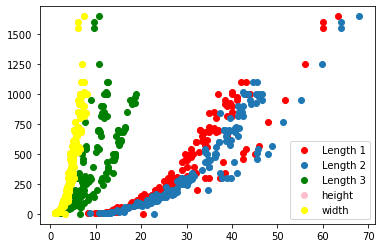

In [45]:
plt.scatter(x[:,8],y,color="red",label="Length 1")
plt.scatter(x[:,9],y,label="Length 2")
plt.scatter(x[:,10],y,color="green",label="Length 3")
plt.scatter(x[:,11],y,label="height",color="pink")
plt.scatter(x[:,11],y,label="width",color="yellow")
plt.legend()
plt.show()

# Multiple Linear Regression

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)*100

95.073524800545

# Polynomial Reg
using Length1

In [117]:
from sklearn.preprocessing import PolynomialFeatures
reg_poly=LinearRegression()
pf=PolynomialFeatures(degree=11)
x_len_1=pf.fit_transform(x_train[:,8:9])
reg_poly.fit(x_len_1,y_train)
y_pred_l=reg_poly.predict(pf.fit_transform(x_test[:,8:9]))
r2_score(y_test,y_pred_l)

0.8727867084160482

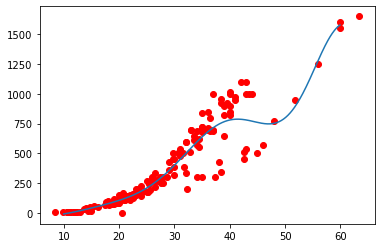

In [118]:
plt.scatter(x[:,8],y,color="red")
plt.plot(np.arange(10,60,0.1),reg_poly.predict(pf.fit_transform(np.arange(10,60,0.1).reshape(-1,1))))
plt.show()

0.935507156277447


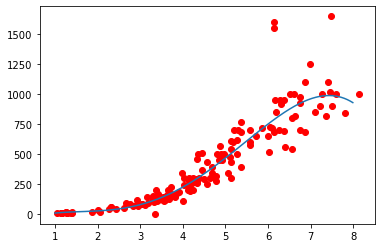

In [133]:
reg_poly_2=LinearRegression()
pf_2=PolynomialFeatures(degree=4)

x_len_1=pf_2.fit_transform(x_train[:,11:12])

reg_poly_2.fit(x_len_1,y_train)
y_pred_l=reg_poly_2.predict(pf_2.fit_transform(x_test[:,11:12]))
print(r2_score(y_test,y_pred_l))

plt.scatter(x[:,11],y,color="red")
plt.plot(np.arange(1,8,0.01),reg_poly_2.predict(pf_2.fit_transform(np.arange(1,8,0.01).reshape(-1,1))))
plt.show()

73.7838704964339


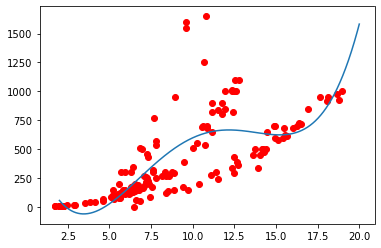

In [151]:
reg_poly_3=LinearRegression()
pf_3=PolynomialFeatures(degree=4)

x_len_2=pf_2.fit_transform(x_train[:,10:11])

reg_poly_3.fit(x_len_2,y_train)
y_pred_l=reg_poly_3.predict(pf_3.fit_transform(x_test[:,10:11]))
print(r2_score(y_test,y_pred_l)*100)

plt.scatter(x[:,10],y,color="red")
plt.plot(np.arange(2,20,0.01),reg_poly_3.predict(pf_3.fit_transform(np.arange(2,20,0.01).reshape(-1,1))))
plt.show()

# SVR Model

In [161]:
from sklearn.svm import SVR 
from sklearn.preprocessing import StandardScaler
s_xtrain=StandardScaler()
s_xtest=StandardScaler()
s_ytrain=StandardScaler()

std_x=s_xtrain.fit_transform(x_train)
std_xt=s_xtrain.transform(x_test)
std_y=s_ytrain.fit_transform(y_train)

reg_svr=SVR(kernel='rbf')
reg_svr.fit(std_x,std_y)

y_pred_svr=reg_svr.predict(std_xt)
print("without using fit : ",r2_score(y_test,s_ytrain.inverse_transform(y_pred_svr))*100)

std_x=s_xtrain.fit_transform(x_train)
std_xt=s_xtest.fit_transform(x_test)
std_y=s_ytrain.fit_transform(y_train)

reg_svr=SVR(kernel='rbf')
reg_svr.fit(std_x,std_y)

y_pred_svr=reg_svr.predict(std_xt)
print("using fit : ",r2_score(y_test,s_ytrain.inverse_transform(y_pred_svr))*100)

without using fit :  94.86204918368945
using fit :  89.62135528810417


F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
F:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Decision Tree

In [165]:
from sklearn.tree import DecisionTreeRegressor
reg_d=DecisionTreeRegressor()
reg_d.fit(x_train,y_train)
ypredd=reg_d.predict(x_test)
r2_score(y_test,ypredd)

0.9527738202684604

# Random Forest

In [210]:
from sklearn.ensemble import RandomForestRegressor
arr=[]
for i in range(150):     
    rfr=RandomForestRegressor(n_estimators=80,random_state=i)
    rfr.fit(x_train,y_train.ravel())
    ypredf=rfr.predict(x_test)
    arr.append(r2_score(y_test,ypredf)*100)
ar=np.array(arr)
ar.max()

97.67766119036277

<h3>Random Forest Has the highest accuracy of 97.67766119036277</h3>